In [ ]:
 import matplotlib.pyplot as plt
 import numpy as np
 from sklearn.mixture import GaussianMixture

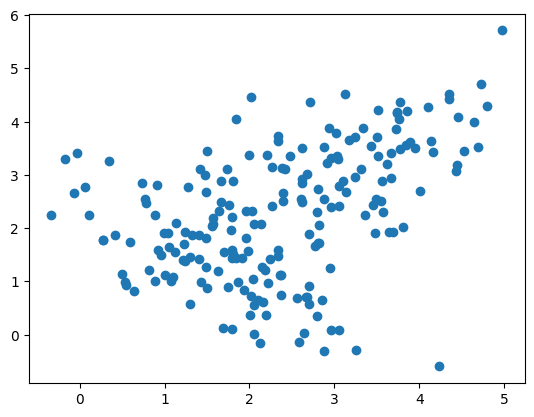

In [ ]:
X_train = np.load('data.npy')
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)
print(f'Medias:\n {gmm.means_}')
print(f'Covarianzas\n {gmm.covariances_}')

Medias:
 [[1.60629419 1.3470999 ]
 [3.0363831  3.09828041]]
Covarianzas
 [[[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]

 [[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]]


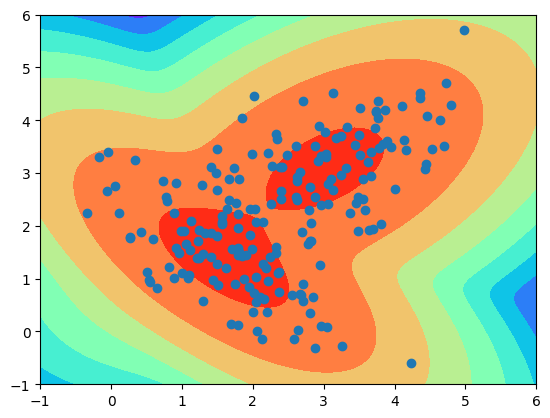

In [ ]:
X,Y = np.meshgrid(np.linspace(-1,6,500),np.linspace(-1,6,500)) #Generar malla de puntos, 500x5000
XX = np.array([X.ravel(),Y.ravel()]).T
Z=gmm.score_samples(XX) # Probabilidad de que pertenezca a un grupo o a otro
Z=Z.reshape((500,500))
plt.contourf(X,Y,Z,cmap='rainbow') #curvas de nivel
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()
#Muestras Gaussianas y en general, los metodos de agrupamiento, pueden servir para ver los valores atipicos

# DBScan ($\epsilon$ y $min$ hiperparámetros)


In [ ]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter

In [ ]:
df = pd.read_csv('winequality.csv')
print(df.shape)
df.head(2)

(6463, 13)


,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [ ]:
data = df.iloc[:,1:3]
data.head(2)

,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30


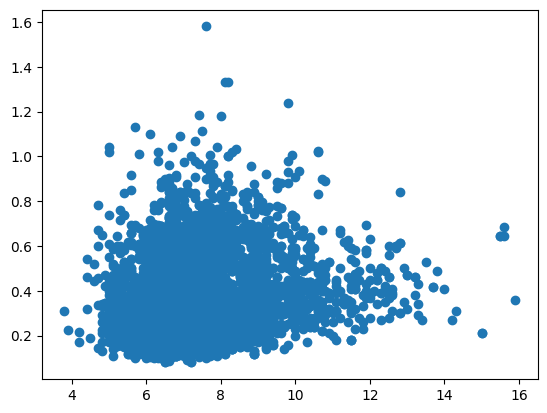

In [ ]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.show()

In [ ]:
dbs = DBSCAN(eps=0.2,min_samples=20).fit(data)
dbs

DBSCAN(eps=0.2, min_samples=20)

In [ ]:
print(Counter(dbs.labels_))
df_anom =pd.DataFrame(data)
print(df_anom[dbs.labels_==-1])

Counter({0: 6281, -1: 117, 1: 40, 2: 25})
      fixed acidity  volatile acidity
1502           14.2             0.270
1927            9.9             1.005
2130            9.8             0.930
2297            4.6             0.445
2601            4.5             0.190
...             ...               ...
6131            6.3             1.020
6169            7.6             1.580
6182            8.0             1.180
6409           11.1             0.440
6414           11.2             0.400

[117 rows x 2 columns]


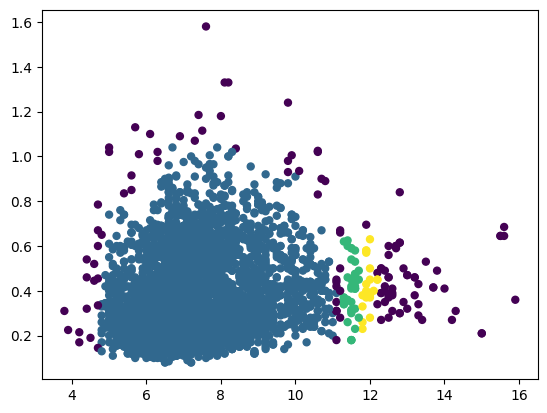

In [ ]:
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=dbs.labels_,s=25)
plt.show()

In [ ]:
dbs.core_samples_indices_